# 05. Fourier Transform
(work in progress)

In [2]:
%pylab inline
from IPython.display import Audio
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


## Discrete Cosine Transform (DCT)
https://en.wikipedia.org/wiki/Discrete_cosine_transform

$X_k =
 \sum_{n=0}^{N-1} x_n \cos \left[\frac{\pi}{N} \left(n+\frac{1}{2}\right) k \right] \quad \quad k = 0, \dots, N-1.$

In [3]:
sr = 44100
T = 0.025
N = int(T* sr)
n = arange(N)
t = n/sr

In [4]:
def DCT(x):
    X = zeros_like(x)
    N = len(x)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] *cos( pi/N * (1/2 +n) *k )
    return X

In [5]:
testSig = zeros(N)
testSig+=cos(2*pi*t*sr/4) # cos at nyq/2 should come out centered

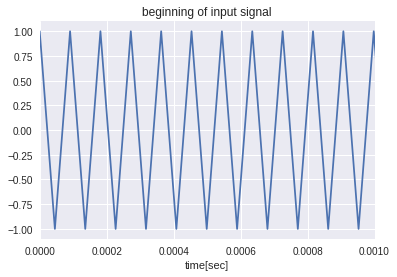

In [10]:
plot(t, testSig)
xlim([0, 0.001])
title('beginning of input signal')
xlabel('time[sec]')
show()

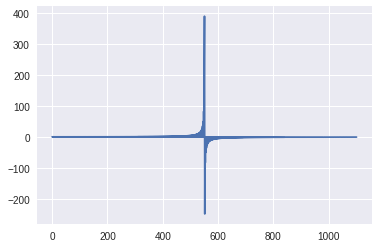

In [6]:
plot(DCT(testSig))
show()

## Discrete Fourier Transform (DFT)
- https://en.wikipedia.org/wiki/Discrete_Fourier_transform
- https://en.wikipedia.org/wiki/Fourier_transform

${\displaystyle {\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right],\end{aligned}}}$

In [25]:
def DFT(x):
    N = len(x)
    X = zeros(N).astype(np.complex)
    
    for k in range(N):
        for n in range(N):
            X[k]= X[k] + x[n]*exp(k*n*((-1j * 2 * pi)/N)  )
    return X

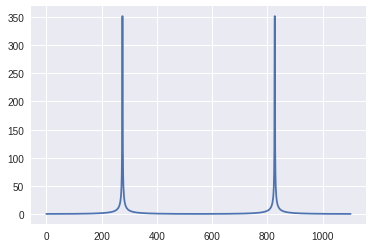

In [31]:
dftRes = DFT(testSig)
plot(abs(dftRes))
show()

The fft's result gives the frequency spectrum but it repeats after $\frac{N}{2}$,
So we drop half of its values and create a requency axis for the plot:

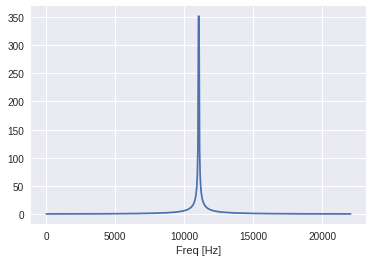

In [37]:
absHalfDFT = abs(fftRes[0:int(N/2)])
freqAxis = linspace(0, sr/2, int(N/2))
plot(freqAxis, absHalfDFT)
xlabel('Freq [Hz]')
show()